# Example for Interval Fuzzy C Means

In [1]:
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering, IntervalFuzzyCMeans
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram
from interClusLib.evaluation import SilhouetteScore
random_data = IntervalData.make_interval_blobs(n_samples=1000, n_clusters=4, n_dims = 5)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()


 Random Interval Data:
     Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
0          -6.829896        -4.302013        -3.765098        -0.660724   
1          -7.861662        -6.716437        -1.509618         1.953164   
2          -7.012581        -5.082260        -2.593857        -0.225878   
3          -5.666326        -2.225668        -2.675130         1.903388   
4           5.881489         8.012941        -9.932972        -7.832321   
..               ...              ...              ...              ...   
995         7.139217        11.073686        -4.926912        -2.291735   
996         4.927310         9.170980        -2.445276        -0.974275   
997         4.091713         7.589343        -9.584048        -8.964127   
998        -6.601073        -5.982633        -1.861365         0.509332   
999        -2.694972         0.917417        -3.752797        -1.071346   

     Feature_3_lower  Feature_3_upper  Feature_4_lower  Feature_4_upper  \


In [2]:
hmodel = IntervalFuzzyCMeans(n_clusters=4,
    m=2.0,
    max_iter=100,
    adaptive_weights=True,  # IFCMADC模式
    random_state=42)
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

Starting Fuzzy C-Means with 1000 samples, 4 clusters...
Iteration 10: objective = 11331.548521, membership change = 0.064083
Iteration 20: objective = 11042.764497, membership change = 0.001946
Converged after 31 iterations
Final objective: 11035.833672
[3 3 3 0 2 1 3 0 2 1 0 2 3 3 1 1 0 0 1 3 0 0 1 2 2 2 0 2 3 1 2 1 2 2 3 2 0
 2 1 1 1 1 1 1 0 3 3 3 0 3 0 3 3 0 0 3 3 2 1 2 2 0 3 0 1 0 3 1 2 1 0 2 1 0
 1 2 1 3 3 2 2 0 1 0 3 2 1 3 2 3 1 3 1 2 2 1 1 3 2 3 1 3 2 0 0 3 0 2 3 1 0
 3 2 1 0 2 2 2 0 0 2 2 3 2 0 1 0 1 1 0 1 0 2 2 3 2 2 2 1 3 1 0 2 1 2 2 3 1
 0 0 0 1 3 0 2 0 0 0 3 0 0 1 1 0 2 3 3 1 3 0 2 0 0 2 0 2 1 0 3 2 0 1 3 1 3
 0 3 2 2 1 0 1 2 2 2 0 0 3 1 0 2 1 3 1 0 1 0 2 3 3 3 2 1 3 0 2 1 1 1 2 1 2
 3 0 0 0 2 0 0 2 0 3 3 3 0 2 0 0 3 3 1 1 3 0 1 3 0 2 3 2 1 1 3 0 2 1 3 2 3
 3 1 2 1 3 3 0 2 2 2 0 1 3 3 1 2 2 1 3 0 0 2 2 2 2 0 2 1 3 0 3 1 3 2 3 3 0
 2 3 2 3 1 1 3 1 0 0 2 3 0 1 0 3 1 0 2 1 1 1 0 0 0 0 0 1 1 3 0 2 3 3 2 0 3
 0 3 1 3 0 0 2 1 3 1 1 1 3 1 0 3 2 0 3 3 0 0 1 2 0 3 1 0 2 0 3 2 2 1 0 

In [3]:
score = SilhouetteScore.silhouette_score(random_data.get_intervals(), hmodel.labels_, metric='euclidean')

print(score)

0.682296391971381


In [4]:
from interClusLib.evaluation import *

In [5]:
score = calinski_harabasz_index(random_data.get_intervals(), labels=hmodel.labels_, metric='euclidean' , centers=hmodel.centroids_)

print(score)

5420.485191971851


In [6]:
score = dunn_index(random_data.get_intervals(), labels=hmodel.labels_, metric='euclidean' , centers=hmodel.centroids_)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Parallel Coordinates'}>)

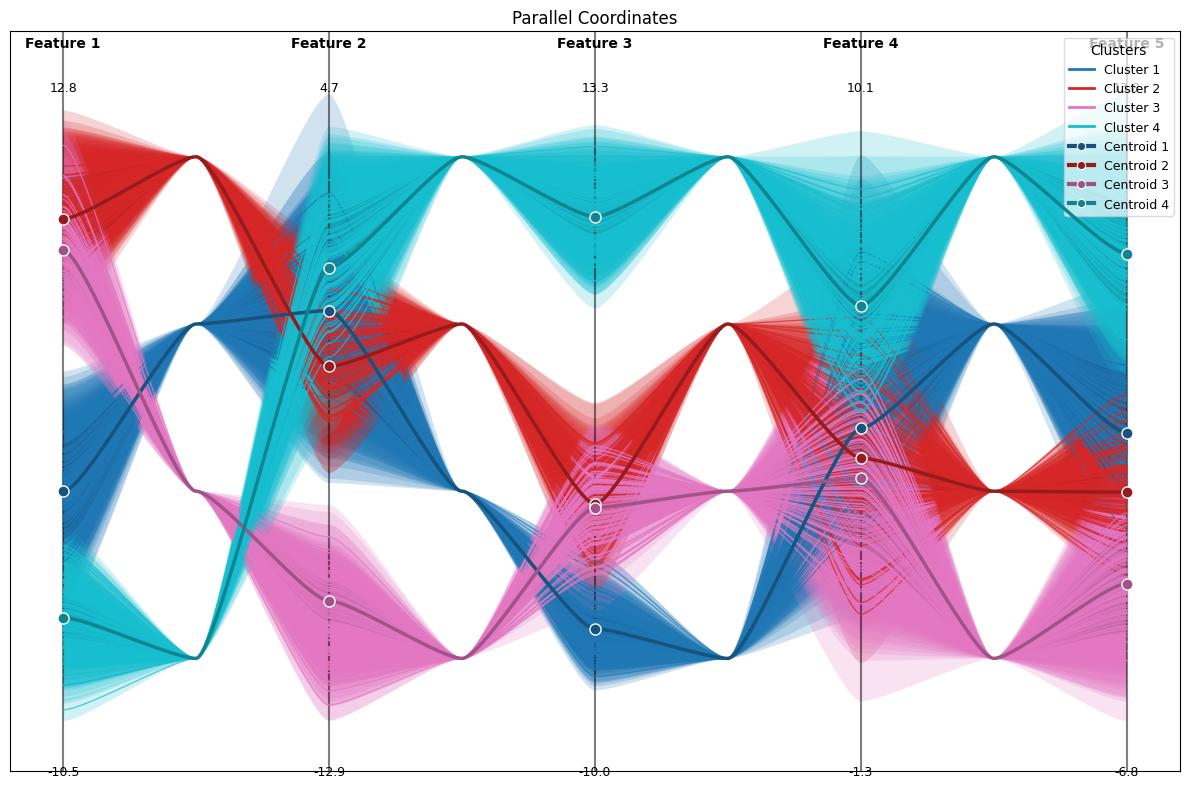

In [7]:
IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), 
                                      feature_names= None, 
                                      centroids= hmodel.centroids_,
                                      labels=hmodel.labels_,
                                      alpha=1/6,
                                      beta = 1,
                                      use_bundling= True,
                                      max_samples_per_cluster=100)